## Part 1 - Is your nearest neighbor close to you in high-dimensional space?

In [ ]:
# Bulent Emin Ustun - 27822

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
import math
import time

### Data Generation

In [ ]:
def random_points(num_points, num_dimensions):
  array = np.random.randn(num_points, num_dimensions)

  return array

In [ ]:
# This code cell is for trying the random_points function to see how it behaves.
array = random_points(4,5)
array

array([[-0.42332466, -0.85599535, -1.84006223,  1.28340889,  0.05473511],
       [-0.61070848, -0.48090926,  2.02514992,  0.07509848, -1.66602424],
       [-0.31062165, -1.67593009, -1.35275266, -1.02969885,  0.63762619],
       [ 0.05562354,  0.30801439,  0.52197753,  0.75150286, -0.31825264]])

### Average Distance of A Selected Point

In [ ]:
# Eucledian distance - It can be done using numpy but I prefered this one

def distance(p1, p2):
  counter = 0

  for i in range(len(p1)):
    counter = counter + (abs(p1[i] - p2[i]) ** 2)

  return math.sqrt(counter)

In [ ]:
# selected_point will be integer
def average_distance_sp(points, selected_point):
  counter = 0
  sum = 0
  for i in range(len(points)):

    if i == selected_point:
      pass
    else:
      sum += distance(points[selected_point], points[i])

  return sum / (len(points) - 1)

In [ ]:
# This code cell is for trying the average_distance_sp function to see how it behaves.
average_dist = average_distance_sp(array, 0)
average_dist

3.248581184568445

### Minimum Distance of A Selected Point

In [ ]:
# selected_point will be integer
def minimum_distance_sp(points, selected_point):
  sum = 0
  min_dist = float('inf')
  for i in range(len(points)):

    if i == selected_point:
      pass
    else:
      sum = distance(points[selected_point], points[i])
      if sum < min_dist:
        min_dist = sum

  return min_dist

In [ ]:
# This code cell is for trying the minimum_distance_sp function to see how it behaves.
min_dista = minimum_distance_sp(array, 0)
print(min_dista)

2.5715160850161842


### Closest-to-Average Ratio

In [ ]:
def closest_to_average_ratio(min_dist, avg_dist):
  return min_dist / avg_dist

In [ ]:
# This code cell is for trying the closest_to_average_ratio function to see how it behaves.
xcv = closest_to_average_ratio(min_dista, average_dist)
xcv

0.79158129008181

### Experimentation and Visualization

In [ ]:
# In this function, we are creating 100 different array from dimensions 1 to 100
# having 1000 points in each dimension. After that, we select 100 random points
# from each dimension then we calculate average distance, minimum distance and
# closest to average ratio. Then we aggregate it and find the mean and
# standard deviation

def create_random_points_with_dim():
  average_distance_mean_array = []
  minimum_distance_mean_array = []
  closest_to_average_ratio_mean_array = []

  average_distance_std_array = []
  minimum_distance_std_array = []
  closest_to_average_ratio_std_array = []


  for i in range(100):
    dim_arr = random_points(1000, i+1)
    avg_dst_temp_arr = []
    min_dst_temp_arr = []
    clst_to_avg_rto_temp_arr = []
    for k in range(100):
      random_point = rand.randint(0,999)

      avg_dst_value = average_distance_sp(dim_arr, random_point)
      min_dist_value = minimum_distance_sp(dim_arr, random_point)
      closest_to_average_ratio_value = closest_to_average_ratio(min_dist_value, avg_dst_value)

      avg_dst_temp_arr.append(avg_dst_value)
      min_dst_temp_arr.append(min_dist_value)
      clst_to_avg_rto_temp_arr.append(closest_to_average_ratio_value)

    average_distance_mean_array.append(np.mean(avg_dst_temp_arr))
    minimum_distance_mean_array.append(np.mean(min_dst_temp_arr))
    closest_to_average_ratio_mean_array.append(np.mean(clst_to_avg_rto_temp_arr))

    average_distance_std_array.append(np.std(avg_dst_temp_arr))
    minimum_distance_std_array.append(np.std(min_dst_temp_arr))
    closest_to_average_ratio_std_array.append(np.std(clst_to_avg_rto_temp_arr))

  return average_distance_mean_array, minimum_distance_mean_array, closest_to_average_ratio_mean_array, average_distance_std_array, minimum_distance_std_array, closest_to_average_ratio_std_array

In [ ]:
# This code cell check if the create_random_points_with_dim works well.
average_distance_mean_array, minimum_distance_mean_array, closest_to_average_ratio_mean_array, average_distance_std_array, minimum_distance_std_array, closest_to_average_ratio_std_array = create_random_points_with_dim()
print(average_distance_mean_array)
print(minimum_distance_mean_array)
print(closest_to_average_ratio_mean_array)
print(average_distance_std_array)
print(minimum_distance_std_array)
print(closest_to_average_ratio_std_array)

[1.116190911641632, 1.730623565243583, 2.3462230773090353, 2.6486409409889817, 2.989183655620725, 3.414366200813041, 3.6242339359689284, 3.8192883258499886, 4.123548652762416, 4.419249509989861, 4.500952490238456, 4.7880737360544705, 5.069608866467646, 5.217225806566148, 5.454357851845646, 5.492139837664776, 5.640506253309485, 5.9302167190059185, 6.045008993229576, 6.296289956074059, 6.4291252211873005, 6.563282299585837, 6.838229253607285, 6.794127036954214, 7.019932697989307, 7.142843275934775, 7.325740099642763, 7.505661243127651, 7.553078337740477, 7.762511999407875, 7.816007191222083, 7.868262361153257, 8.181984986998069, 8.146527516022662, 8.342034925826663, 8.404484349000121, 8.517466264937845, 8.791730787129646, 8.786043426564541, 8.827188991272983, 9.167398614230644, 9.09737260760455, 9.309828247614188, 9.419520059717748, 9.455331774268117, 9.571512713341386, 9.636966864267881, 9.67736142263237, 9.822838421880986, 10.002641545147505, 9.964373575872987, 10.174040035780912, 10.2

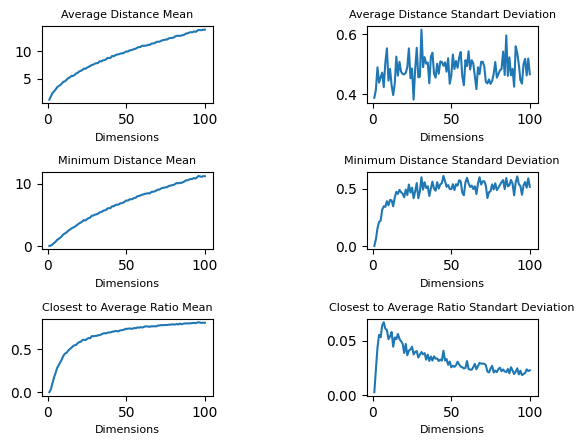

In [ ]:
# In this code cell, shows the plots of dimension count in x-axis and in y-axis;
# we show mean mean and standard deviation.

num_dimensions_list = list(range(1, 101))

plt.subplot(3,2,1)
plt.title("Average Distance Mean", fontsize=8)
plt.xlabel("Dimensions", fontsize=8)
plt.plot(num_dimensions_list, average_distance_mean_array)

plt.subplot(3,2,2)
plt.title("Average Distance Standart Deviation", fontsize=8)
plt.xlabel("Dimensions", fontsize=8)
plt.plot(num_dimensions_list, average_distance_std_array)

plt.subplot(3,2,3)
plt.title("Minimum Distance Mean", fontsize=8)
plt.xlabel("Dimensions", fontsize=8)
plt.plot(num_dimensions_list, minimum_distance_mean_array)

plt.subplot(3,2,4)
plt.title("Minimum Distance Standard Deviation", fontsize=8)
plt.xlabel("Dimensions", fontsize=8)
plt.plot(num_dimensions_list, minimum_distance_std_array)

plt.subplot(3,2,5)
plt.title("Closest to Average Ratio Mean", fontsize=8)
plt.xlabel("Dimensions", fontsize=8)
plt.plot(num_dimensions_list, closest_to_average_ratio_mean_array)

plt.subplot(3,2,6)
plt.title("Closest to Average Ratio Standart Deviation", fontsize=8)
plt.xlabel("Dimensions", fontsize=8)
plt.plot(num_dimensions_list, closest_to_average_ratio_std_array)


plt.subplots_adjust(wspace=0.9, hspace=0.9)


When we look at the average distance mean, we see that it is linearly increasing which means the points are going far away from each other. In average distance standard deviation plot, we see that it is vawy.


In minimum distance mean plot, we see that it is linearly increasing like average distance mean plot. This increasing trend can lead difficulty in finding neighbors. In minimum distance standard deviation plots, we see a linear increase but then it turns to a wavy line.

In closest to average ratio mean plot, we see that it is increasing for a while and then converging approximately to 1. It is normal since we know that in high dimensional space, all pairs of points are almost equidistant from one another. When we look at the standard deviation of closest to average ratio, it increases for a while then decreasing to a certain point.



In [ ]:
# This is a helper funtion for calculating pairwise distance.

def pairwise_distance(points):
  distances = []
  for i in range(len(points)):
    for k in range(i + 1, len(points)):
      sum = np.linalg.norm(points[i] - points[k])

      distances.append(sum)

  return distances


In [ ]:
# In all_distances array, I store distances specific to each dimension from 2 to 100

dimension_numbers = [2, 5, 10, 100]

all_distances = []

for i in dimension_numbers:
  dimensional_array = random_points(1000, i)
  distances = pairwise_distance(dimensional_array)
  all_distances.append(distances)


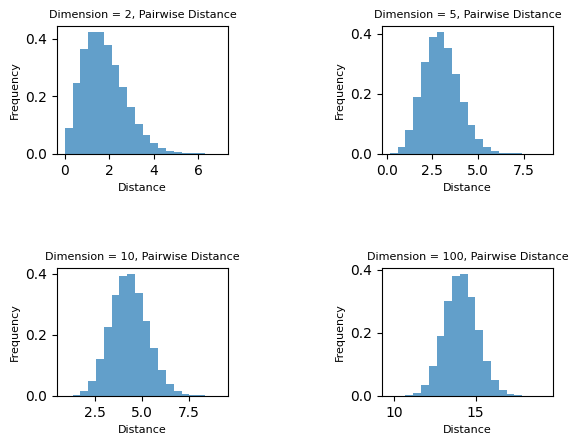

In [ ]:
# We are plotting histograms in this cell

plt.subplot(2,2,1)
plt.title("Dimension = 2, Pairwise Distance", fontsize=8)
plt.xlabel("Distance", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.hist(all_distances[0], bins=20, density=True, alpha=0.7)

plt.subplot(2,2,2)
plt.title("Dimension = 5, Pairwise Distance", fontsize=8)
plt.xlabel("Distance", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.hist(all_distances[1], bins=20, density=True, alpha=0.7)

plt.subplot(2,2,3)
plt.title("Dimension = 10, Pairwise Distance", fontsize=8)
plt.xlabel("Distance", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.hist(all_distances[2], bins=20, density=True, alpha=0.7)

plt.subplot(2,2,4)
plt.title("Dimension = 100, Pairwise Distance", fontsize=8)
plt.xlabel("Distance", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.hist(all_distances[3], bins=20, density=True, alpha=0.7)

plt.subplots_adjust(wspace=0.9, hspace=0.9)

From these plots, we see that pairwise distance increase when we increase the dimensionality. Also, as the number of dimension grows, all distances are getting to concentrate within a smaller range. This trend is called ***the curse of dimensionality***.

## Part 2 - kNN Classifier in Action


### Part 2.1 - Dataset

In [ ]:
from sklearn import metrics
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Checking the shapes

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


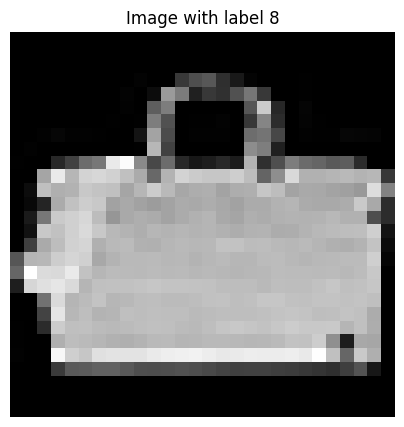

In [ ]:
# Just for trying the dataset

idx = 99
image, label = X_train[idx], y_train[idx]

plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')
plt.title("Image with label {}".format(label))
plt.axis('off')
plt.show()

In [ ]:
# Splitting the training data to form 80% training data and 20% validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, shuffle=True)

In [ ]:
# Checking the shapes again

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(48000, 28, 28) (48000,)
(10000, 28, 28) (10000,)
(12000, 28, 28) (12000,)


### Part 2.2 - Find the Best K

In [ ]:
# Rehaping the dataset
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

In [ ]:
# Checking train, validation and test data

print("Train data = ", X_train.shape, y_train.shape)
print("Test data = ", X_test.shape, y_test.shape)
print("Validation data = ", X_val.shape, y_val.shape)

Train data =  (48000, 784) (48000,)
Test data =  (10000, 784) (10000,)
Validation data =  (12000, 784) (12000,)


The optimal k value is  7  and its accuracy is 0.8540833333333333


Text(0, 0.5, 'validation-accuracy')

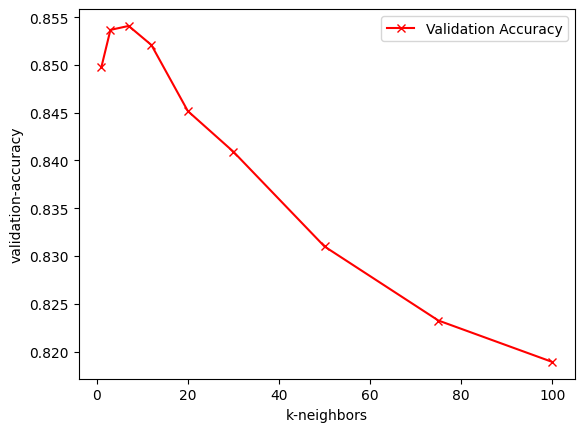

In [ ]:
# Calculating the optimal k value and its accuracy

k_numbers = [1, 3, 7, 12, 20, 30, 50, 75, 100]
validation_accuracies = []
for k in k_numbers:
  knn = KNN(n_neighbors=k)
  knn.fit(X_train, y_train)
  validation_accuracies.append(knn.score(X_val, y_val))

maximum_accuracy = max(validation_accuracies)

for i in range(len(validation_accuracies)):
  if validation_accuracies[i] == maximum_accuracy:
    idx = i

print("The optimal k value is ",k_numbers[idx], " and its accuracy is", maximum_accuracy)

optimal_k_value = k_numbers[idx]


plt.figure()
plt.plot(k_numbers, validation_accuracies, "rx-", label="Validation Accuracy")
plt.legend()
plt.xlabel("k-neighbors")
plt.ylabel("validation-accuracy")

In [ ]:
# Checking the shapes before concatanating

print("Train data = ", X_train.shape, y_train.shape)
print("Test data = ", X_test.shape, y_test.shape)
print("Validation data = ", X_val.shape, y_val.shape)

Train data =  (48000, 784) (48000,)
Test data =  (10000, 784) (10000,)
Validation data =  (12000, 784) (12000,)


In [ ]:
# In here, we concatanate the data for training the final kNN model

X_train = np.concatenate([X_train, X_val])
y_train = np.concatenate([y_train, y_val])

In [ ]:
# Checking if they are concotanated well

print("Train data = ", X_train.shape, y_train.shape)
print("Test data = ", X_test.shape, y_test.shape)
print("Validation data = ", X_val.shape, y_val.shape)

Train data =  (60000, 784) (60000,)
Test data =  (10000, 784) (10000,)
Validation data =  (12000, 784) (12000,)


In [ ]:
# Training the model on train + val

k = optimal_k_value
knn = KNN(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("The test accuracy of {k}-NN is {acc}".format(k=k, acc=test_accuracy))

The test accuracy of 7-NN is 0.854


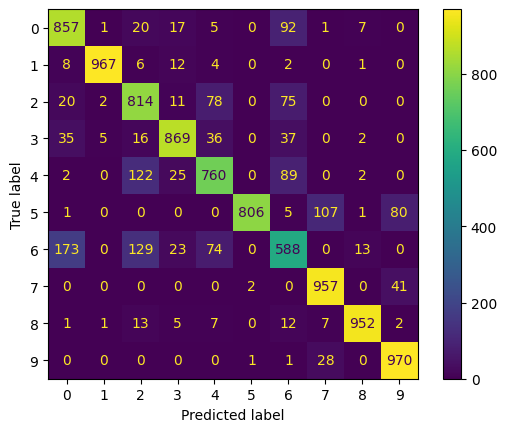

In [ ]:
# Confusion matrix

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

confusion_matrix_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

confusion_matrix_plot.plot()
plt.show()

From this confusion matrix, it can be seen that our predictions are generally okay. The only section where our predictions are not well is **label 6**. This class (**label 6**) has the highest number of misclassifications which is 412.

Misclassification numbers in labels:
  - *Label 0*: 143
  - *Label 1*: 33
  - *Label 2*: 186
  - *Label 3*: 131
  - *Label 4*: 240
  - *Label 5*: 194
  - *Label 6*: 412
  - *Label 7*: 43
  - *Label 8*: 48
  - *Label 9*: 30



The most common misprediction(misclassification) is **label 0** instead of predicting **label 6**. Another high misclasification is that our model predicted **label 2** where they should be predicted **label 6**.

In addition, our predictions are problematic in **label 4**. As you can see from the matrix, our model predicted **label 2** and **label 6** instead of **label 4**. Also, our model predicted **label 7 and 9** instead of predicting **label 5**.